In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [2]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=5,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.05,
            horizontal_flip=True,
            validation_split=0.20,
            fill_mode='constant')

directory='./data/train'
batch_size = 8
class_mode = "categorical"
target_size = (180, 180)    
classes = ['low', 'mid', 'high']

train_generator = datagen.flow_from_directory(directory,classes=classes,target_size=target_size,batch_size=batch_size,class_mode=class_mode,
        subset="training")

validation_generator = datagen.flow_from_directory(directory,classes=classes,target_size=target_size,batch_size=batch_size,class_mode=class_mode,
        subset="validation")

Found 181 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


Epoch 1/38
23/23 [==============================] - 7s 221ms/step - loss: 0.9181 - accuracy: 0.5809 - val_loss: 0.4324 - val_accuracy: 0.8140
Epoch 2/38
23/23 [==============================] - 4s 178ms/step - loss: 0.3807 - accuracy: 0.8179 - val_loss: 0.5392 - val_accuracy: 0.7674
Epoch 3/38
23/23 [==============================] - 4s 177ms/step - loss: 0.2892 - accuracy: 0.8614 - val_loss: 0.2888 - val_accuracy: 0.9070
Epoch 4/38
23/23 [==============================] - 4s 177ms/step - loss: 0.2775 - accuracy: 0.9018 - val_loss: 0.4547 - val_accuracy: 0.8140
Epoch 5/38
23/23 [==============================] - 5s 201ms/step - loss: 0.2054 - accuracy: 0.9430 - val_loss: 0.3266 - val_accuracy: 0.9070
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


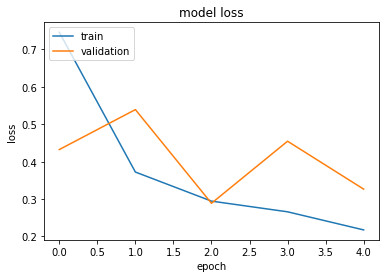

In [5]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min",
                                        patience = 5,
                                        restore_best_weights = True)


history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=40,
                    callbacks =[earlystopping],
                    verbose=1)



#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
# model.save('./../rep_3classes_256dense_augmented_earlystopped')

INFO:tensorflow:Assets written to: rep_3classes_256dense_augmented_earlystopped/assets
